<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/ML-LAB/blob/main/BIRCH%2C%20Bagging%2C%20AdaBoost%2C%20MajorityVoting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIRCH MODEL ON MALL CUSTOMER

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/Mall_customers (1).csv")


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



✅ Clustered Data:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       0   19                  15                      39   
1             2       0   21                  15                      81   
2             3       1   20                  16                       6   
3             4       1   23                  16                      77   
4             5       1   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       1   35                 120                      79   
196         197       1   45                 126                      28   
197         198       0   32                 126                      74   
198         199       0   32                 137                      18   
199         200       0   30                 137                      83   

     Cluster  
0          0  
1          0  
2          0  
3       

/tmp/ipython-input-3882625705.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


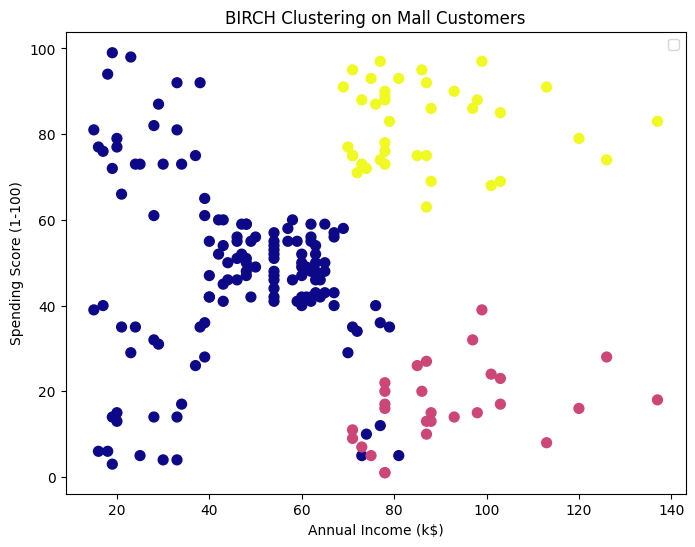

In [11]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch

# Step 2: Load Dataset


# Step 3: Data Preprocessing
# Convert categorical Gender to numeric (optional for BIRCH)
#df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 4: Feature Selection
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply BIRCH Clustering
birch_model = Birch(n_clusters=3)  # You can experiment with n_clusters

df['Cluster']=birch_model.fit_predict(X_scaled)



print("\n✅ Clustered Data:")
print(df)

# Step 8: Visualize Clusters (using Income vs Spending)
plt.figure(figsize=(8, 6))

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=df['Cluster'], cmap='plasma', s=50)

plt.title('BIRCH Clustering on Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# # Step 9: Interpretation
# for c in df['Cluster'].unique():
#     print(f"\nCluster {c} Summary:")
#     print(df[df['Cluster'] == c].describe())


# VOTING CLASSIFIER ON HEART DATASET

In [ ]:
df1=pd.read_csv("/content/heart (1).csv")

In [ ]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



✅ Accuracy: 0.7802197802197802

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.83      0.76      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



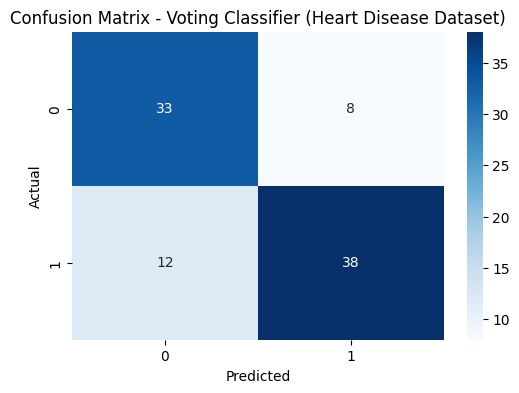


🔍 Individual Model Accuracies:
Logistic Regression: 0.8132
Decision Tree: 0.7363
Random Forest: 0.8352
Voting Classifier: 0.7802


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Step 4: Define features (X) and target (y)
X = df1.drop('target', axis=1)
y = df1['target']

# Step 5: Feature Scaling (very important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 7: Define Base Models
log_clf = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 8: Create Voting Classifier (both hard and soft)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', tree_clf),
        ('rf', rf_clf)
    ],
    voting='soft'   # 'hard' = majority vote, 'soft' = probability averaging
)

# Step 9: Train the Model
voting_clf.fit(X_train, y_train)

# Step 10: Predictions
y_pred = voting_clf.predict(X_test)

# Step 11: Evaluate Performance
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Classifier (Heart Disease Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 13: Compare individual model accuracies
models = [("Logistic Regression", log_clf),
          ("Decision Tree", tree_clf),
          ("Random Forest", rf_clf)]

print("\n🔍 Individual Model Accuracies:")
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{name}: {acc:.4f}")

print(f"Voting Classifier: {accuracy_score(y_test, y_pred):.4f}")


# BAGGING ON HEART DATASET

In [ ]:
df2=pd.read_csv("/content/heart (1).csv")
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



✅ Accuracy: 0.8351648351648352

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



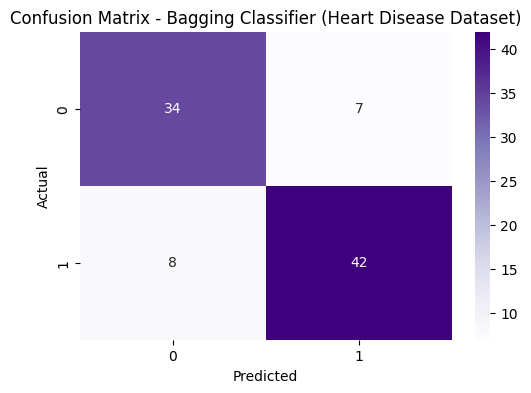


🔍 Comparison:
Decision Tree Accuracy: 0.7363
Bagging Classifier Accuracy: 0.8352


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Step 4: Define Features and Target
X = df1.drop('target', axis=1)
y = df1['target']

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Step 7: Define Base Estimator (Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)

# Step 8: Initialize Bagging Classifier
bag_clf = BaggingClassifier(
    estimator=base_model,   # base model for bagging
    n_estimators=100,        # number of trees
    max_samples=0.8,         # fraction of training samples used for each estimator
    bootstrap=True,          # sampling with replacement
    random_state=42
)

# Step 9: Train the Model
bag_clf.fit(X_train, y_train)

# Step 10: Predictions
y_pred = bag_clf.predict(X_test)

# Step 11: Evaluate Model
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Bagging Classifier (Heart Disease Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 13: Compare with Single Decision Tree (to show improvement)
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)

print("\n🔍 Comparison:")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")


# ADA BOOST ON HEART DATASET


✅ Accuracy: 0.8131868131868132

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



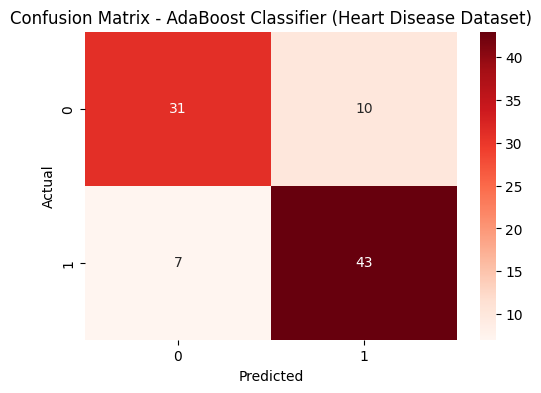


🔍 Comparison:
Decision Tree (weak learner) Accuracy: 0.6923
AdaBoost Classifier Accuracy: 0.8132


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
df3 = pd.read_csv("/content/heart (1).csv")   # Replace with your actual CSV filename

# Step 4: Define Features and Target
X = df1.drop('target', axis=1)
y = df1['target']

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split Data into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Step 7: Define Base Estimator (Weak Learner)
# Use shallow Decision Tree (depth=1 or 2) for boosting
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Step 8: Initialize AdaBoost Classifier
ada_clf = AdaBoostClassifier(
    estimator=base_estimator,   # weak learner
    n_estimators=100,           # number of boosting rounds
    learning_rate=0.1,          # controls contribution of each model
    random_state=42
)

# Step 9: Train the Model
ada_clf.fit(X_train, y_train)

# Step 10: Make Predictions
y_pred = ada_clf.predict(X_test)

# Step 11: Evaluate the Model
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - AdaBoost Classifier (Heart Disease Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 13: Compare with Base Decision Tree
simple_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
simple_tree.fit(X_train, y_train)
y_pred_tree = simple_tree.predict(X_test)

print("\n🔍 Comparison:")
print(f"Decision Tree (weak learner) Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"AdaBoost Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")
